In [ ]:
# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# read in the data, parse the dates, and set the index
df = pd.read_csv('../stress_partitioning/mobile_shear_velocity_2023.csv', parse_dates=['Date_Time'], index_col='Date_Time')
# separate by season
spring = df['2023-03-01':'2023-06-21'].copy()
summer = df['2023-06-22':'2023-09-21'].copy()


### Calculate u*/ws for different grain sizes

#### Spring

In [2]:
# spring u*/ws values (settling velocities)
spring.loc[:, '0.5'] = df['u*'] / 0.00000007
spring.loc[:, '1'] = df['u*'] / 0.00000029
spring.loc[:, '2'] = df['u*'] / 0.00000125
spring.loc[:, '5'] = df['u*'] / 0.00001235
spring.loc[:, '20'] = df['u*'] / 0.00023806
spring.loc[:, '45'] = df['u*'] / 0.0013
spring.loc[:, '63'] = df['u*'] / 0.0024
spring.loc[:, '100'] = df['u*'] / 0.0060
spring.loc[:, '200'] = df['u*'] / 0.01761
spring.loc[:, '280'] = df['u*'] / 0.02870
spring.loc[:, '500'] = df['u*'] / 0.06183
spring.loc[:, '700'] = df['u*'] / 0.09129
spring.loc[:, '850'] = df['u*'] / 0.11186
spring.loc[:, '1000'] = df['u*'] / 0.13080
spring.loc[:, '2000'] = df['u*'] / 0.21894


Plot

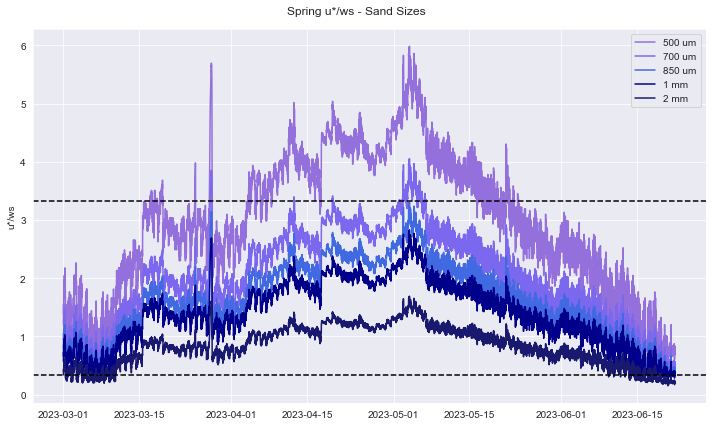

In [3]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

#plt.plot(spring['200'], color='orchid', label='200 um')
plt.plot(spring['500'], color='mediumpurple', label='500 um')
plt.plot(spring['700'], color='mediumslateblue', label='700 um')
plt.plot(spring['850'], color='royalblue', label='850 um')
plt.plot(spring['1000'], color='darkblue', label='1 mm')
plt.plot(spring['2000'], color='midnightblue', label='2 mm')

plt.axhline(y=0.333, color='k', linestyle='--')
plt.axhline(y=3.333, color='k', linestyle='--')

plt.ylabel('u*/ws')
plt.xlabel('')
plt.legend()
plt.suptitle('Spring u*/ws - Sand Sizes')
plt.tight_layout()
plt.show()

Calculate total time in suspension

In [4]:
# calculate the total time where u*/ws > 3.333 for each grain size in spring
upper = 3.33
grain_sizes = [col for col in spring.columns if col not in ['u*']]  # excludes the u* column

# calculate the time delta between rows (in hours)
timestep_hours = (spring.index[1] - spring.index[0]).total_seconds() / 3600 # convert to hours, 15 min intervals are 0.25 hours
mixed_counts = (spring[grain_sizes] > upper).sum() # count the number of time steps in range
mixed_hours = mixed_counts * timestep_hours # convert counts to hours

# save as DataFrame
suspended_spring_times = pd.DataFrame({
    'size': [float(size) for size in grain_sizes],  # convert to float if needed
    'time': mixed_hours.values
})

Calculate total time as mixed load 

In [5]:
# calculate the total time in hours where 0.33 < u*/ws < 3.33 for each grain size in spring
lower = 0.33
upper = 3.33
grain_sizes = [col for col in spring.columns if col not in ['u*']]  # excludes the u* column

# calculate the time delta between rows (in hours)
timestep_hours = (spring.index[1] - spring.index[0]).total_seconds() / 3600 # convert to hours, 15 min intervals are 0.25 hours
mixed_counts = ((spring[grain_sizes] > lower) & (spring[grain_sizes] < upper)).sum() # count the number of time steps in range
mixed_hours = mixed_counts * timestep_hours # convert counts to hours

# save as DataFrame
mixed_spring_times = pd.DataFrame({
    'size': [float(size) for size in grain_sizes],  # convert to float if needed
    'time': mixed_hours.values
})

#### Summer

In [6]:
# summer u*/ws values (settling velocities)
summer.loc[:, '0.5'] = df['u*'] / 0.00000008
summer.loc[:, '1'] = df['u*'] / 0.00000034
summer.loc[:, '2'] = df['u*'] / 0.00000151
summer.loc[:, '5'] = df['u*'] / 0.00001487
summer.loc[:, '20'] = df['u*'] / 0.00028262
summer.loc[:, '45'] = df['u*'] / 0.0015
summer.loc[:, '63'] = df['u*'] / 0.0028
summer.loc[:, '100'] = df['u*'] / 0.0069
summer.loc[:, '200'] = df['u*'] / 0.01989
summer.loc[:, '280'] = df['u*'] / 0.03215
summer.loc[:, '500'] = df['u*'] / 0.06815
summer.loc[:, '700'] = df['u*'] / 0.09952
summer.loc[:, '850'] = df['u*'] / 0.12107
summer.loc[:, '1000'] = df['u*'] / 0.14065
summer.loc[:, '2000'] = df['u*'] / 0.22928

Plot

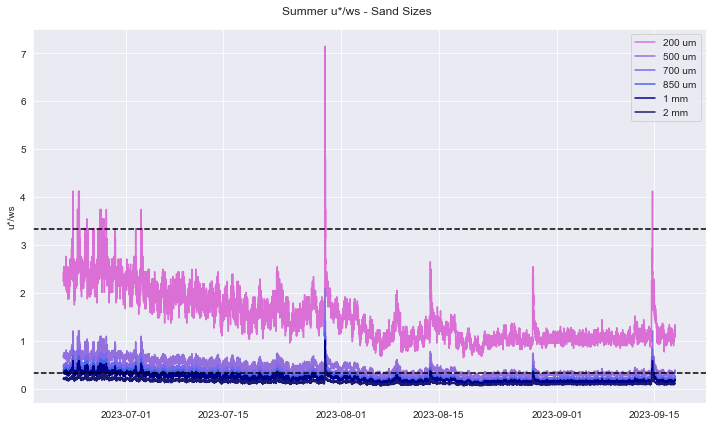

In [8]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

#plt.plot(summer['100'], color='lightpink', label='100 um')
plt.plot(summer['200'], color='orchid', label='200 um')
plt.plot(summer['500'], color='mediumpurple', label='500 um')
plt.plot(summer['700'], color='mediumslateblue', label='700 um')
plt.plot(summer['850'], color='royalblue', label='850 um')
plt.plot(summer['1000'], color='darkblue', label='1 mm')
plt.plot(summer['2000'], color='midnightblue', label='2 mm')

plt.axhline(y=0.333, color='k', linestyle='--')
plt.axhline(y=3.333, color='k', linestyle='--')

plt.ylabel('u*/ws')
plt.xlabel('')
plt.legend()
plt.suptitle('Summer u*/ws - Sand Sizes')
plt.tight_layout()
plt.show()

Calculate total time in suspension

In [9]:
# calculate the total time where u*/ws > 3.333 for each grain size in spring
upper = 3.33
grain_sizes = [col for col in summer.columns if col not in ['u*']]  # excludes the u* column

# calculate the time delta between rows (in hours)
timestep_hours = (summer.index[1] - summer.index[0]).total_seconds() / 3600 # convert to hours, 15 min intervals are 0.25 hours
mixed_counts = (summer[grain_sizes] > upper).sum() # count the number of time steps in range
mixed_hours = mixed_counts * timestep_hours # convert counts to hours

# save as DataFrame
suspended_summer_times = pd.DataFrame({
    'size': [float(size) for size in grain_sizes],  # convert to float if needed
    'time': mixed_hours.values
})

Calculate total time as mixed load

In [10]:
# calculate the total time in hours where 0.33 < u*/ws < 3.33 for each grain size in spring
lower = 0.33
upper = 3.33
grain_sizes = [col for col in summer.columns if col not in ['u*']]  # excludes the u* column

# calculate the time delta between rows (in hours)
timestep_hours = (summer.index[1] - summer.index[0]).total_seconds() / 3600 # convert to hours, 15 min intervals are 0.25 hours
mixed_counts = ((summer[grain_sizes] > lower) & (summer[grain_sizes] < upper)).sum() # count the number of time steps in range
mixed_hours = mixed_counts * timestep_hours # convert counts to hours

# save as DataFrame
mixed_summer_times = pd.DataFrame({
    'size': [float(size) for size in grain_sizes],  # convert to float if needed
    'time': mixed_hours.values
})

### Transport mode plots

In [ ]:
# classify the data by grain size class
def classify_grain(size):
    if size >= 850:
        return 'Coarse Sand'
    elif size >= 63:
        return 'Fine Sand'
    elif size >= 2:
        return 'Silt'
    else:
        return 'Clay'

suspended_spring_times['class'] = suspended_spring_times['size'].apply(classify_grain)
suspended_summer_times['class'] = suspended_summer_times['size'].apply(classify_grain)
mixed_spring_times['class'] = mixed_spring_times['size'].apply(classify_grain)
mixed_summer_times['class'] = mixed_summer_times['size'].apply(classify_grain)

Spring

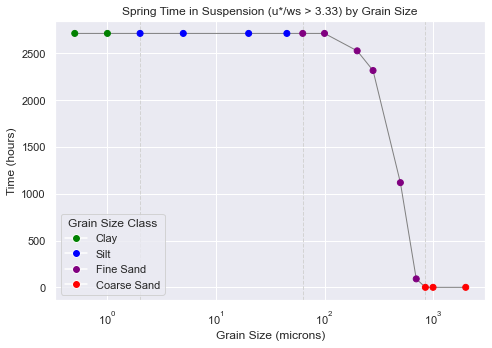

In [38]:
# SUSPENSION PLOT
# color mapping for classes
class_colors = {
    'Clay': 'green',
    'Silt': 'blue',
    'Fine Sand': 'purple',
    'Coarse Sand': 'red'
}
# map colors to each point
colors = suspended_spring_times['class'].map(class_colors)

plt.figure(figsize=(7, 5))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot connecting line
# sort data by size for line connection
sorted_df = suspended_spring_times.sort_values('size')
plt.plot(
    sorted_df['size'],
    sorted_df['time'],
    color='gray',
    linestyle='-',
    linewidth=1,
    zorder=1
)

# scatter plot for suspended spring times
plt.scatter(
    suspended_spring_times['size'],
    suspended_spring_times['time'],
    c=colors,
    label=None
)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Spring Time in Suspension (u*/ws > 3.33) by Grain Size')
plt.xscale('log')
plt.tight_layout()

# custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Clay', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Silt', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Fine Sand', markerfacecolor='purple', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Coarse Sand', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title='Grain Size Class')

plt.show()

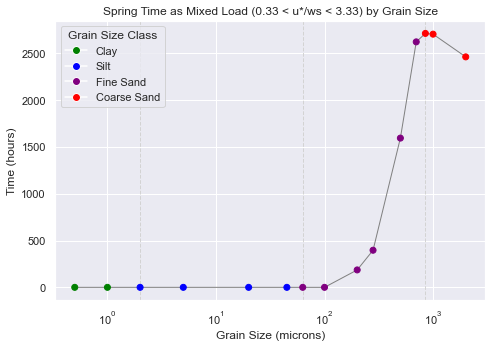

In [41]:
# MIXED LOAD PLOT
# color mapping for classes
class_colors = {
    'Clay': 'green',
    'Silt': 'blue',
    'Fine Sand': 'purple',
    'Coarse Sand': 'red'
}
# map colors to each point
colors = mixed_spring_times['class'].map(class_colors)

plt.figure(figsize=(7, 5))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot connecting line
# sort data by size for line connection
sorted_df = mixed_spring_times.sort_values('size')
plt.plot(
    sorted_df['size'],
    sorted_df['time'],
    color='gray',
    linestyle='-',
    linewidth=1,
    zorder=1
)

# scatter plot for suspended spring times
plt.scatter(
    mixed_spring_times['size'],
    mixed_spring_times['time'],
    c=colors,
    label=None
)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Spring Time as Mixed Load (0.33 < u*/ws < 3.33) by Grain Size')
plt.xscale('log')
plt.tight_layout()

# custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Clay', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Silt', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Fine Sand', markerfacecolor='purple', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Coarse Sand', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title='Grain Size Class')

plt.show()

Summer

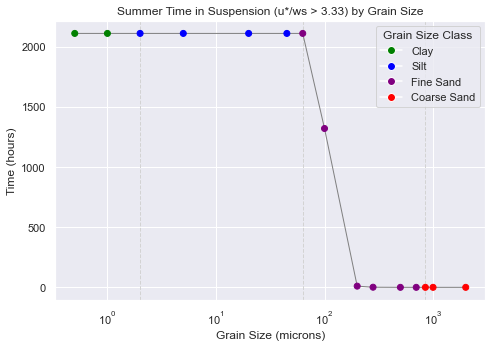

In [40]:
# SUSPENSION PLOT
# color mapping for classes
class_colors = {
    'Clay': 'green',
    'Silt': 'blue',
    'Fine Sand': 'purple',
    'Coarse Sand': 'red'
}
# map colors to each point
colors = suspended_summer_times['class'].map(class_colors)

plt.figure(figsize=(7, 5))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot connecting line
# sort data by size for line connection
sorted_df = suspended_summer_times.sort_values('size')
plt.plot(
    sorted_df['size'],
    sorted_df['time'],
    color='gray',
    linestyle='-',
    linewidth=1,
    zorder=1
)

# scatter plot for suspended spring times
plt.scatter(
    suspended_summer_times['size'],
    suspended_summer_times['time'],
    c=colors,
    label=None
)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Summer Time in Suspension (u*/ws > 3.33) by Grain Size')
plt.xscale('log')
plt.tight_layout()

# custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Clay', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Silt', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Fine Sand', markerfacecolor='purple', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Coarse Sand', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title='Grain Size Class')

plt.show()

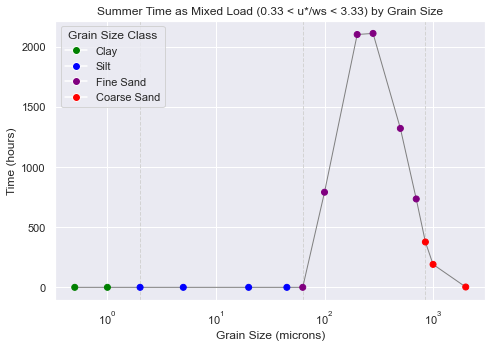

In [42]:
# MIXED LOAD PLOT
# color mapping for classes
class_colors = {
    'Clay': 'green',
    'Silt': 'blue',
    'Fine Sand': 'purple',
    'Coarse Sand': 'red'
}
# map colors to each point
colors = mixed_summer_times['class'].map(class_colors)

plt.figure(figsize=(7, 5))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot connecting line
# sort data by size for line connection
sorted_df = mixed_summer_times.sort_values('size')
plt.plot(
    sorted_df['size'],
    sorted_df['time'],
    color='gray',
    linestyle='-',
    linewidth=1,
    zorder=1
)

# scatter plot for suspended spring times
plt.scatter(
    mixed_summer_times['size'],
    mixed_summer_times['time'],
    c=colors,
    label=None
)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Summer Time as Mixed Load (0.33 < u*/ws < 3.33) by Grain Size')
plt.xscale('log')
plt.tight_layout()

# custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Clay', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Silt', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Fine Sand', markerfacecolor='purple', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Coarse Sand', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title='Grain Size Class')

plt.show()

Both Seasons Combined

In [62]:
# function to plot each season/class combination
def plot_season(df, season_label, color, markers):
    for grain_class, marker in markers.items():
        class_df = df[df['class'] == grain_class]
        # sort by size for line connection
        class_df = class_df.sort_values('size')
        # connect points for each class
        plt.plot(
            class_df['size'],
            class_df['time'],
            color=color,
            linestyle='-',
            linewidth=1,
            alpha=0.5,
            zorder=2
        )
        # scatter points
        plt.scatter(
            class_df['size'],
            class_df['time'],
            color=color,
            marker=marker,
            edgecolor='black',
            label=f"{season_label} - {grain_class}",
            s=60,
            zorder=3
        )

# function to plot each subplot
def subplot_season(ax, df, season_label, color, markers):
    for grain_class, marker in markers.items():
        class_df = df[df['class'] == grain_class].sort_values('size')
        # Connect points for each class
        ax.plot(
            class_df['size'],
            class_df['time'],
            color=color,
            linestyle='-',
            linewidth=1,
            alpha=0.5,
            zorder=2
        )
        # Scatter points with black edge
        ax.scatter(
            class_df['size'],
            class_df['time'],
            color=color,
            marker=marker,
            s=60,
            edgecolor='black',
            linewidth=1,
            zorder=3
        )

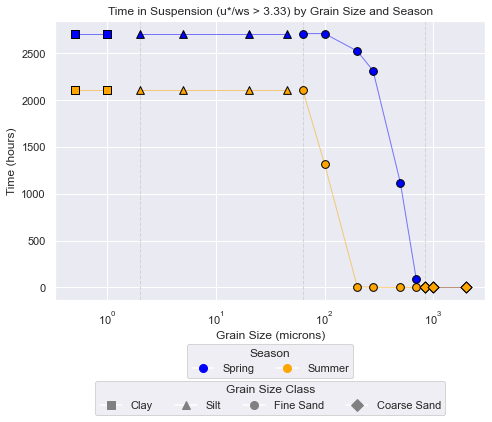

In [59]:
# SUSPENSION PLOT
# color and marker mapping
season_colors = {'Spring': 'blue', 'Summer': 'orange'}
markers = { 'Clay': 's', 'Silt': '^', 'Fine Sand': 'o', 'Coarse Sand': 'D'}

plt.figure(figsize=(7, 5))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot spring data
plot_season(suspended_spring_times, 'Spring', season_colors['Spring'], markers)
# plot summer data
plot_season(suspended_summer_times, 'Summer', season_colors['Summer'], markers)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Time in Suspension (u*/ws > 3.33) by Grain Size and Season')
plt.xscale('log')
plt.tight_layout()

# legend for season
season_legend = [
    Line2D([0], [0], marker='o', color='w', label=season,
            markerfacecolor=color, markeredgecolor=color, markersize=8)
    for season, color in season_colors.items()]
# legend for grain size classes (shapes)
class_legend = [
    Line2D([0], [0], marker=marker, color='w', label=grain_class,
            markerfacecolor='gray', markeredgecolor='gray', markersize=8,)
    for grain_class, marker in markers.items()]
# place legends at the bottom
first_legend = plt.legend(handles=season_legend, title='Season', loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=len(season_legend))
second_legend = plt.legend(handles=class_legend, title='Grain Size Class', loc='lower center', bbox_to_anchor=(0.5, -0.43), ncol=len(class_legend))
plt.gca().add_artist(first_legend)

plt.show()

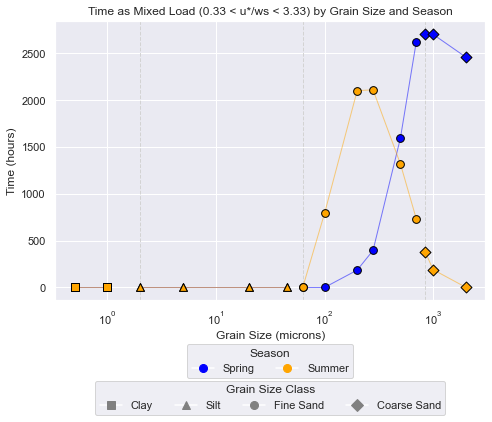

In [60]:
# MIXED LOAD PLOT
# color and marker mapping
season_colors = {'Spring': 'blue', 'Summer': 'orange'}
markers = { 'Clay': 's', 'Silt': '^', 'Fine Sand': 'o', 'Coarse Sand': 'D'}

plt.figure(figsize=(7, 5))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot spring data
plot_season(mixed_spring_times, 'Spring', season_colors['Spring'], markers)
# plot summer data
plot_season(mixed_summer_times, 'Summer', season_colors['Summer'], markers)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Time as Mixed Load (0.33 < u*/ws < 3.33) by Grain Size and Season')
plt.xscale('log')
plt.tight_layout()

# legend for season
season_legend = [
    Line2D([0], [0], marker='o', color='w', label=season,
            markerfacecolor=color, markeredgecolor=color, markersize=8)
    for season, color in season_colors.items()]
# legend for grain size classes (shapes)
class_legend = [
    Line2D([0], [0], marker=marker, color='w', label=grain_class,
            markerfacecolor='gray', markeredgecolor='gray', markersize=8,)
    for grain_class, marker in markers.items()]
# place legends at the bottom
first_legend = plt.legend(handles=season_legend, title='Season', loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=len(season_legend))
second_legend = plt.legend(handles=class_legend, title='Grain Size Class', loc='lower center', bbox_to_anchor=(0.5, -0.43), ncol=len(class_legend))
plt.gca().add_artist(first_legend)

plt.show()

Subplot

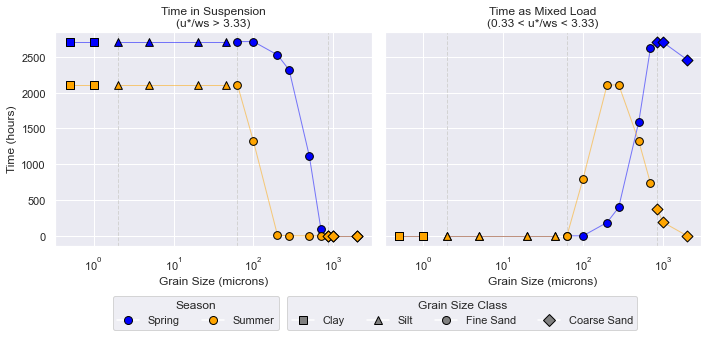

In [76]:
# color and marker mapping
season_colors = {'Spring': 'blue', 'Summer': 'orange'}
markers = {'Clay': 's', 'Silt': '^', 'Fine Sand': 'o', 'Coarse Sand': 'D'}

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# suspension load plot (left) 
ax = axes[0]
for boundary in [2, 63, 850]:
    ax.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)
subplot_season(ax, suspended_spring_times, 'Spring', season_colors['Spring'], markers)
subplot_season(ax, suspended_summer_times, 'Summer', season_colors['Summer'], markers)
ax.set_xlabel('Grain Size (microns)')
ax.set_ylabel('Time (hours)')
ax.set_title('Time in Suspension\n(u*/ws > 3.33)')
ax.set_xscale('log')

# mixed plot (right)
ax = axes[1]
for boundary in [2, 63, 850]:
    ax.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)
subplot_season(ax, mixed_spring_times, 'Spring', season_colors['Spring'], markers)
subplot_season(ax, mixed_summer_times, 'Summer', season_colors['Summer'], markers)
ax.set_xlabel('Grain Size (microns)')
ax.set_title('Time as Mixed Load\n(0.33 < u*/ws < 3.33)')
ax.set_xscale('log')

plt.tight_layout(rect=[0, 0.15, 1, 1])  # leave space at the bottom for legends

# Legends at the bottom
# season legend (color dots with black edge)
season_legend = [
    Line2D([0], [0], marker='o', color='w', label=season,
            markerfacecolor=color, markeredgecolor='black', markersize=8)
    for season, color in season_colors.items()
]
# Grain size class legend (gray shapes with black edge)
class_legend = [
    Line2D([0], [0], marker=marker, color='w', label=grain_class,
            markerfacecolor='gray', markeredgecolor='black', markersize=8)
    for grain_class, marker in markers.items()
]

# Add legends below both plots
fig.legend(handles=season_legend, title='Season', loc='lower center', bbox_to_anchor=(0.28, 0.05), ncol=len(season_legend))
fig.legend(handles=class_legend, title='Grain Size Class', loc='lower center', bbox_to_anchor=(0.65, 0.05), ncol=len(class_legend))

plt.show()

Subplot + Bedload

In [82]:
# importing bedload data
bedload_spring_times = pd.read_csv('../bedload_tauc/bedload_spring_times.csv')
bedload_summer_times = pd.read_csv('../bedload_tauc/bedload_summer_times.csv')

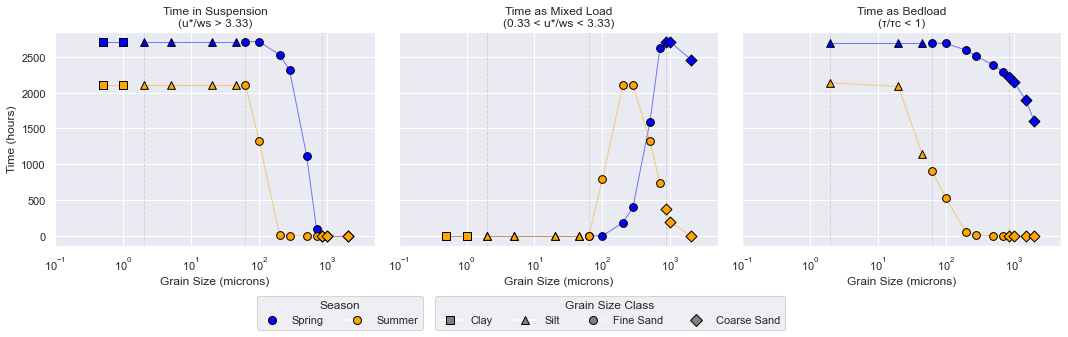

In [94]:
# color and marker mapping
season_colors = {'Spring': 'blue', 'Summer': 'orange'}
markers = {'Clay': 's', 'Silt': '^', 'Fine Sand': 'o', 'Coarse Sand': 'D'}

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# set the same x-axis limits for all subplots
x_min = 0.1   # or min grain size in your data
x_max = 5000  # or max grain size in your data
for ax in axes:
    ax.set_xlim(x_min, x_max)

# suspension load plot (left) 
ax = axes[0]
for boundary in [2, 63, 850]:
    ax.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)
subplot_season(ax, suspended_spring_times, 'Spring', season_colors['Spring'], markers)
subplot_season(ax, suspended_summer_times, 'Summer', season_colors['Summer'], markers)
ax.set_xlabel('Grain Size (microns)')
ax.set_ylabel('Time (hours)')
ax.set_title('Time in Suspension\n(u*/ws > 3.33)')
ax.set_xscale('log')

# mixed plot (middle)
ax = axes[1]
for boundary in [2, 63, 850]:
    ax.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)
subplot_season(ax, mixed_spring_times, 'Spring', season_colors['Spring'], markers)
subplot_season(ax, mixed_summer_times, 'Summer', season_colors['Summer'], markers)
ax.set_xlabel('Grain Size (microns)')
ax.set_title('Time as Mixed Load\n(0.33 < u*/ws < 3.33)')
ax.set_xscale('log')

# bedload plot (right)
ax = axes[2]
for boundary in [2, 63, 850]:
    ax.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)
subplot_season(ax, bedload_spring_times, 'Spring', season_colors['Spring'], markers)
subplot_season(ax, bedload_summer_times, 'Summer', season_colors['Summer'], markers)
ax.set_xlabel('Grain Size (microns)')
ax.set_title('Time as Bedload\n(τ/τc < 1)')
ax.set_xscale('log')

plt.tight_layout(rect=[0, 0.15, 1, 1])  # leave space at the bottom for legends

# Legends at the bottom
# season legend (color dots with black edge)
season_legend = [
    Line2D([0], [0], marker='o', color='w', label=season,
            markerfacecolor=color, markeredgecolor='black', markersize=8)
    for season, color in season_colors.items()
]
# Grain size class legend (gray shapes with black edge)
class_legend = [
    Line2D([0], [0], marker=marker, color='w', label=grain_class,
            markerfacecolor='gray', markeredgecolor='black', markersize=8)
    for grain_class, marker in markers.items()
]

# Add legends below both plots
fig.legend(handles=season_legend, title='Season', loc='lower center', bbox_to_anchor=(0.32, 0.05), ncol=len(season_legend))
fig.legend(handles=class_legend, title='Grain Size Class', loc='lower center', bbox_to_anchor=(0.57, 0.05), ncol=len(class_legend))

plt.show()